## The time it takes to ramp up, the time it takes to ramp down and the steady state power to reach the average

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.integrate import quad


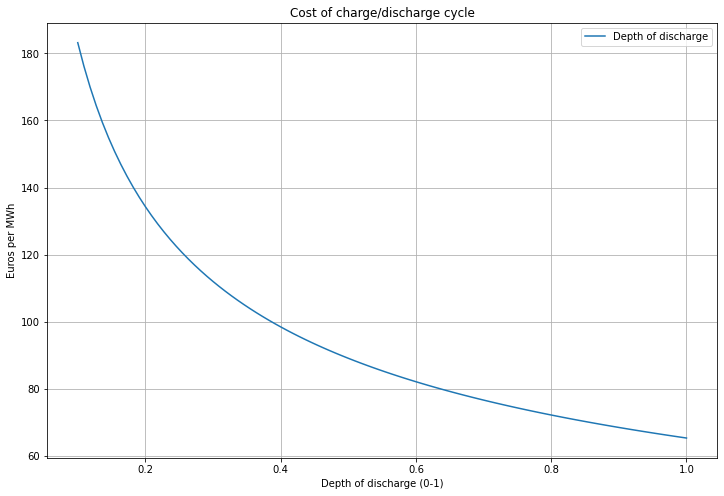

In [2]:

E_a = 31500  # Activation energy in J/mol
R = 8.314  # Universal gas constant in J/(mol*K)
z = 0.552
E_rate = 53.1  # Rated capacity of the battery in MWh
T = 300  # Temperature in Kelvinz
C= 19e6
A = 330.330
Eff = 0.95
R_constant = R

E_rate_joules = E_rate * 3.6e9  # Convert MWh to Joules
C = 19e6  # Cost factor
eta_dis = 0.95  # Discharge efficiency

def Q_cycle(h, E_rate_joules, A, E_a, R, T, z):
    return A * np.exp(-E_a / (R * T)) * (h * E_rate_joules)**z

h_values_fraction = np.linspace(0.1,1, 100)


Q_loss_mwh_values_per_MWh = [Q_cycle(h, E_rate, A, E_a, R, T, z)*(19e6/53.1) / (h*53.1) for h in h_values_fraction]




plt.figure(figsize=(12, 8))
plt.plot(h_values_fraction, Q_loss_mwh_values_per_MWh, label='Depth of discharge')
plt.xlabel('Depth of discharge (0-1)')
plt.ylabel('Euros per MWh')
plt.title('Cost of charge/discharge cycle')
plt.legend()
plt.grid(True)

plt.savefig('costs_mwh.pdf')

plt.show()

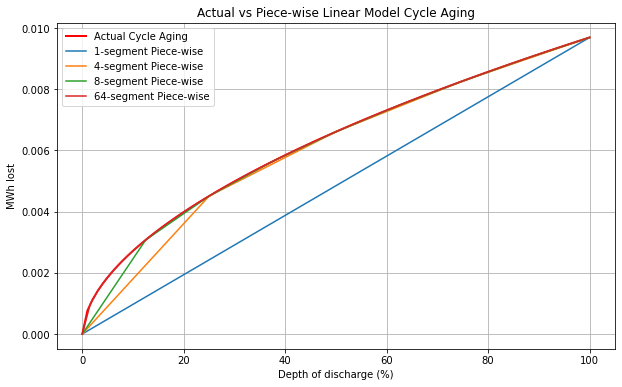

In [3]:


# Number of segments
N_segments = [1, 4, 8, 64]

actual_h_values= np.arange(0, 1.01, 0.01)

actual_cycle_aging = [Q_cycle(h, E_rate, A, E_a, R_constant, T, z) for h in actual_h_values]


plt.figure(figsize=(10, 6))
plt.plot(actual_h_values * 100, actual_cycle_aging, label='Actual Cycle Aging', linewidth=2, color='red')
plt.xlabel('Depth of discharge (%)')
plt.ylabel('MWh lost')
plt.title('Actual vs Piece-wise Linear Model Cycle Aging')

for N in N_segments:
    h_values_piecewise = np.linspace(0, 1, N + 1)
    
    cycle_aging_piecewise = [Q_cycle(h, E_rate, A, E_a, R_constant, T, z) for h in h_values_piecewise]
    
    plt.plot(h_values_piecewise * 100, cycle_aging_piecewise, label=f'{N}-segment Piece-wise')

plt.legend()
plt.grid(True)

plt.show()


